## Preparing Data

In [ ]:
import glob
import numpy as np
import torch
from torch.utils.data import DataLoader
import pandas as pd
from matplotlib import pyplot as plt
import os
from osgeo import gdal
import math
from PIL import Image
from tqdm import tqdm
import time

In [ ]:
pre_flist = glob.glob("/content/pre-disas/"+"*.tiff")
pre_flist.sort()

post_flist = glob.glob("/content/post-disas/"+"*.tiff")
post_flist.sort()

In [ ]:
pre_flist = [pre_flist[i] for i in range(len(pre_flist)) if i<4 ]
post_flist = [post_flist[i] for i in range(len(post_flist)) if i<4 ]

In [ ]:
pre_flist

['/content/pre-disas/2023-06-14-00:00_2023-06-14-23:59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/content/pre-disas/2023-06-14-00:00_2023-06-14-23:59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/content/pre-disas/2023-06-14-00:00_2023-06-14-23:59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/content/pre-disas/2023-06-14-00:00_2023-06-14-23:59_Sentinel-2_L2A_B04_(Raw).tiff']

In [ ]:
post_flist

['/content/post-disas/2023-07-19-00:00_2023-07-19-23:59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/content/post-disas/2023-07-19-00:00_2023-07-19-23:59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/content/post-disas/2023-07-19-00:00_2023-07-19-23:59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/content/post-disas/2023-07-19-00:00_2023-07-19-23:59_Sentinel-2_L2A_B04_(Raw).tiff']

In [ ]:
image_list = []
for f in pre_flist:
    val = gdal.Open(f).ReadAsArray()
    image_list.append(val)
image_arr = np.asarray(image_list)
print(image_arr.shape)
# create a dataframe to store the band parameters
para=pd.DataFrame()
for i in range(image_arr.shape[0]):

    data_scaled=image_arr[i,:,::]*1 # no scaled

    max = np.max(data_scaled)
    min = np.min(data_scaled)
    mean = np.mean(data_scaled)
    median = np.median(data_scaled)
    std = np.std(data_scaled)


    values = [ max, min, mean, median, std]
    names = [ 'max', 'min', 'mean', 'median', 'std']

    out = pd.Series(dict(zip(names, values)))
    row = pd.Series({'band':str(i+1)})
    row = row.append(out)
    print('band '+str(i+1)+" finished")

    para = para.append(row,ignore_index=True)

del image_arr,image_list

(4, 1608, 1374)
band 1 finished
band 2 finished
band 3 finished
band 4 finished


<ipython-input-174-1c4eb8551ff5>:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row = row.append(out)
<ipython-input-174-1c4eb8551ff5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  para = para.append(row,ignore_index=True)
<ipython-input-174-1c4eb8551ff5>:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row = row.append(out)
<ipython-input-174-1c4eb8551ff5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  para = para.append(row,ignore_index=True)
<ipython-input-174-1c4eb8551ff5>:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row = row

In [ ]:
para

,band,max,min,mean,median,std
0,1,151.0,6.0,18.726336,17.0,6.169597
1,2,255.0,2.0,21.538757,19.0,9.674371
2,3,255.0,8.0,29.325137,27.0,10.869260
3,4,255.0,6.0,36.206785,34.0,13.552948


In [ ]:
image_list = []
for f in post_flist:
    val = gdal.Open(f).ReadAsArray()
    image_list.append(val)
image_arr = np.asarray(image_list)
print(image_arr.shape)
# create a dataframe to store the band parameters
para=pd.DataFrame()
for i in range(image_arr.shape[0]):

    data_scaled=image_arr[i,:,::]*1 # no scaled

    max = np.max(data_scaled)
    min = np.min(data_scaled)
    mean = np.mean(data_scaled)
    median = np.median(data_scaled)
    std = np.std(data_scaled)


    values = [ max, min, mean, median, std]
    names = [ 'max', 'min', 'mean', 'median', 'std']

    out = pd.Series(dict(zip(names, values)))
    row = pd.Series({'band':str(i+1)})
    row = row.append(out)
    print('band '+str(i+1)+" finished")

    para = para.append(row,ignore_index=True)

del image_arr,image_list

(4, 1608, 1374)
band 1 finished
band 2 finished
band 3 finished
band 4 finished


<ipython-input-13-25a51f496ae7>:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row = row.append(out)
<ipython-input-13-25a51f496ae7>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  para = para.append(row,ignore_index=True)
<ipython-input-13-25a51f496ae7>:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row = row.append(out)
<ipython-input-13-25a51f496ae7>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  para = para.append(row,ignore_index=True)
<ipython-input-13-25a51f496ae7>:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row = row.appe

In [ ]:
para

,band,max,min,mean,median,std
0,1,141.0,6.0,18.708497,18.0,5.718679
1,2,255.0,0.0,23.100706,21.0,9.549387
2,3,255.0,4.0,29.449422,27.0,11.183702
3,4,255.0,6.0,36.682764,35.0,13.876719


In [ ]:
band_dict = {1: "Band 1 - Blue", 2: "Band 2 - Green", 3: "Band 3 - Red", 4: "Band 4 - NIR"}

In [ ]:
def normalizaed_data(img):
    #min-max normalization of the image based on all images
    #four bands, for different min, max
    max = [151, 255, 255, 255]
    min = [6, 0, 4, 6]
    img_normalized=np.zeros(img.shape)
    for i in range(4):
        img_normalized[i,:,:]=(img[i,:,:]-min[i])/(max[i]-min[i])

    return img_normalized.astype(np.float64)

In [ ]:
def recover_data(arr):
    #recover min-max normalized image
    max = [151, 255, 255, 255]
    min = [6, 0, 4, 6]
    img_recovered=np.zeros(arr.shape)
    for i in range(4):
        img_recovered[i,:,:]=arr[i,:,:]*(max[i]-min[i])+min[i]

    return img_recovered.astype(np.float64)

In [ ]:
def tiffs_to_3d_array(tiff_files):
    try:
        tif_arrays = []
        for tiff_file in tiff_files:
            with Image.open(tiff_file) as img:
                # Convert the image to a NumPy array
                img_array = np.array(img)
                tif_arrays.append(img_array)

        # Stack the arrays along the first dimension (band dimension)
        result_array = np.stack(tif_arrays, axis=0)
        return result_array

    except Exception as e:
        print("Error occurred:", e)
        return None

In [ ]:
def load_image(img_src,normalization = True):
    '''
    args:
    img_src - directory to the target image

    return:
    data_mtrx - a dictionary of two data matrices for pre and post fire; each of them is in 3 dimensions (band,rows,cols)
    meta_data - metadata includes: transformation, projection, numerber of rows, number of columns, number of bands
    band_dict - band dictionary includes the information of each band
    '''

    threedtiff = tiffs_to_3d_array(img_src)

    if normalization:
        ds_arr = normalizaed_data(threedtiff)
    print("Loading image is done!")
    return ds_arr

In [ ]:
def create_image_tile(img_src, out_dir, stride_size=32, tile_size = 32):
    '''
    args:
    data_mtrx - a path to 3-dimensional data matrix read from a satellite image

    tile_size - the size of the tile in integer, the default size is 3*3
    stride_size - the size of the stride in integer, for the size of moving pixels for each tile
    output - True/False, whether output the data matrix, the default is False
    out_dir - output directory of the tiled image the default is None. If the ouput is True, the out_dir is required. Output data type should be acceptable for the numpy.save, npy is recommended.

    return:
    data_mtrx_tile - a data matrix of the image after tiling

    '''
    data_mtrx = load_image(img_src)
    print(data_mtrx.shape)
    bands, rows, cols = data_mtrx.shape

    print("Start tiling the image...")

    new_rows = math.floor(1+(rows-tile_size)/stride_size) #asking huiqi to check this one, need to be changed
    new_cols = math.floor(1+(cols-tile_size)/stride_size)

    print("The numbers of rows and columns after tiling are (%d, %d)"%(new_rows,new_cols))

    for i in range(new_rows):
        if i<10:
            str_new_rows = '000'+str(i)
        elif i<100:
            str_new_rows = '00'+str(i)
        # if not os.path.exists(os.path.join(out_dir,str_new_rows)):
        #       os.mkdir(os.path.join(out_dir,str_new_rows))
        for j in range(new_cols):
            if j<10:
                str_new_cols = '000'+str(j)
            elif j<100:
                str_new_cols = '00'+str(j)
            cropped_arr = data_mtrx[:,i*stride_size : (i*stride_size+tile_size), j*stride_size : (j*stride_size+tile_size)]
            # cropped_arr[cropped_arr==0.0]=np.nan
            if np.isnan(cropped_arr).sum() == 0:
                output_file = os.path.join(out_dir,str_new_rows+'_'+str_new_cols+".npy")
                np.save(output_file, cropped_arr)
            if i == 0 and j==0:
                print("After tiling, the size of data matrix becomes: ", cropped_arr.shape)
    del data_mtrx, cropped_arr

### Prepare PreFire

In [ ]:
!mkdir Pre_nparray
!mkdir Post_nparray

In [ ]:
Post_dir = 'Post_nparray'
Pre_dir = 'Pre_nparray'

In [ ]:
start = time.time()
create_image_tile(pre_flist,out_dir = "/content/"+Pre_dir,stride_size=16, tile_size =32)
print("Done. %.2f mintues" %((time.time()-start)/60))

Loading image is done!
(4, 1608, 1374)
Start tiling the image...
The numbers of rows and columns after tiling are (99, 84)
After tiling, the size of data matrix becomes:  (4, 32, 32)
Done. 0.06 mintues


In [ ]:
test = np.load("/content/"+Pre_dir+"/0006_0008.npy")
test = test*10

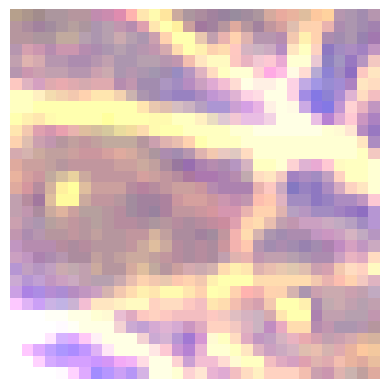

In [ ]:
plt.figure()
plt.imshow(np.moveaxis(test[[2,1,0],:,:],0,-1))
plt.axis("off")
plt.show()

In [ ]:
pre_list = glob.glob("/content/"+Pre_dir+"/*.npy")

In [ ]:
len(pre_list)

8316

### Prepare PostFire

In [ ]:
start = time.time()
create_image_tile(post_flist,out_dir = "/content/"+Post_dir,stride_size=16, tile_size = 32)
print("Done. %.2f mintues" %((time.time()-start)/60))

Loading image is done!
(4, 1608, 1374)
Start tiling the image...
The numbers of rows and columns after tiling are (99, 84)
After tiling, the size of data matrix becomes:  (4, 32, 32)
Done. 0.05 mintues


In [ ]:
test = np.load("/content/"+Post_dir+"/0006_0008.npy")
test = test*10

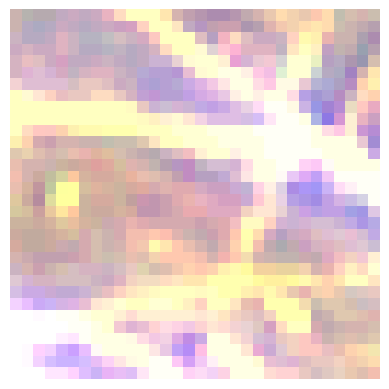

In [ ]:
plt.figure()
plt.imshow(np.moveaxis(test[[2,1,0],:,:],0,-1))
plt.axis("off")
plt.show()

In [ ]:
post_list = glob.glob("/content/"+Post_dir+"/*.npy")

In [ ]:
len(post_list)

8316

## Prediction

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import torchvision
from torchvision import transforms
from torchvision import models
import torchvision.transforms.functional as TF
import torch
from torch import nn
import torch.backends.cudnn as cudnn
from torch.utils.data import DataLoader
from torch.utils.data.dataloader import default_collate
from torch.utils.data import Dataset
from torchsummary import summary
from tqdm import tqdm
import PIL
from PIL import Image
from skimage import io, transform
import random
import argparse

In [ ]:
class FixedRotationTransform:
    """Rotate by one of the given angles."""

    def __init__(self, angles):
        self.angles = angles

    def __call__(self, x):
        angle = random.choice(self.angles)
        return TF.rotate(x, angle)

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [ ]:
class ContrastiveLearningViewGenerator(object):
    """Take two random crops of one image as the query and key."""

    def __init__(self, base_transform, n_views=2):
        self.base_transform = base_transform
        self.n_views = n_views

    def __call__(self, x):
        return [self.base_transform(x) for i in range(self.n_views)]


class ContrastiveLearningDataset:
    def __init__(self, num_trans_func,list_trans):
        self.num_trans_func = num_trans_func
        self.list_trans = list_trans

    def random_number(self):
        return np.random.randint(0,self.num_trans_func)

    def get_trans_func(self):

        idx1 = self.random_number()
        idx2 = self.random_number()

        img_transforms = transforms.Compose([transforms.ToTensor(), #must have to read the array as a PIL image, then could be used as an input to transforms
                                        self.list_trans[idx1],
                                        self.list_trans[idx2]])

        return img_transforms

In [ ]:
class Load_Transformed_Dataset(Dataset):
    def __init__(self, training_flist, transform=None):
        self.training_flist = training_flist
        self.transform = transform

    def __len__(self):
        return len(self.training_flist)

    def __getitem__(self, idx):
        img_dir = self.training_flist[idx]
        img_arr = np.load(img_dir) #channel, h, w
        #not sure why, but img_arr need to change to h,w,c to make the transform work
        img_arr = np.moveaxis(img_arr,0,-1)
        #print(img_arr.shape)
        if self.transform:
            img_arr = self.transform(img_arr)
            #img_arr = img_arr[0] #get the tensor from list

        return img_arr

In [ ]:
ds_ex = gdal.Open("/content/post-disas/2023-07-19-00:00_2023-07-19-23:59_Sentinel-2_L2A_True_color.tiff")

ds_geot = ds_ex.GetGeoTransform()
ds_proj = ds_ex.GetProjection()
ds_rows = ds_ex.RasterYSize
ds_cols = ds_ex.RasterXSize
ds_bands = ds_ex.RasterCount

print(ds_geot,ds_proj,ds_rows,ds_cols,ds_bands)
geot = [23.854958, 8.98376764386535e-05, 0.0, 37.83684, 0.0, -7.100000000000145e-05]

(23.904808, 8.985371179039333e-05, 0.0, 37.849261, 0.0, -7.099253731343361e-05) GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]] 1608 1374 3


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using device:", device)

Using device: cuda


In [ ]:
checkpoint = torch.load('/content/S2_Mesa.tar', map_location = device)

state_dict = checkpoint['state_dict']

for name in state_dict:
    print(name)

module.encoder.conv.0.0.weight
module.encoder.conv.0.0.bias
module.encoder.conv.0.2.weight
module.encoder.conv.0.2.bias
module.encoder.conv.1.0.weight
module.encoder.conv.1.0.bias
module.encoder.conv.1.2.weight
module.encoder.conv.1.2.bias
module.projection.0.weight
module.projection.0.bias
module.projection.2.weight
module.projection.2.bias


In [ ]:
for k in list(state_dict.keys()):
    if k.startswith('module.encoder.'):
        print(k)
        print(state_dict[k].shape)
        #print(k[len('module.encoder.'):])
        #print(state_dict[k])
        state_dict[k[len('module.encoder.'):]] = state_dict[k]

module.encoder.conv.0.0.weight
torch.Size([32, 4, 3, 3])
module.encoder.conv.0.0.bias
torch.Size([32])
module.encoder.conv.0.2.weight
torch.Size([32, 32, 3, 3])
module.encoder.conv.0.2.bias
torch.Size([32])
module.encoder.conv.1.0.weight
torch.Size([256, 32, 3, 3])
module.encoder.conv.1.0.bias
torch.Size([256])
module.encoder.conv.1.2.weight
torch.Size([256, 256, 3, 3])
module.encoder.conv.1.2.bias
torch.Size([256])


In [ ]:
print(state_dict.keys())

odict_keys(['module.encoder.conv.0.0.weight', 'module.encoder.conv.0.0.bias', 'module.encoder.conv.0.2.weight', 'module.encoder.conv.0.2.bias', 'module.encoder.conv.1.0.weight', 'module.encoder.conv.1.0.bias', 'module.encoder.conv.1.2.weight', 'module.encoder.conv.1.2.bias', 'module.projection.0.weight', 'module.projection.0.bias', 'module.projection.2.weight', 'module.projection.2.bias', 'conv.0.0.weight', 'conv.0.0.bias', 'conv.0.2.weight', 'conv.0.2.bias', 'conv.1.0.weight', 'conv.1.0.bias', 'conv.1.2.weight', 'conv.1.2.bias'])


In [ ]:
class SimpleCNN(nn.Module):
    """
    4-layer fully conv CNN
    """
    def __init__(self, n_channels, tile_size, out_dim):
        super().__init__()

        self.conv = nn.Sequential(
            self.double_conv(n_channels, tile_size),
            self.double_conv(tile_size, out_dim),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten()
        )

    def double_conv(self,input_size,output_size):

        return nn.Sequential(
            nn.Conv2d(input_size, output_size, kernel_size = 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(output_size, output_size, kernel_size = 3, padding=1),
            nn.ReLU(inplace=True))

    def forward(self, x):
        return self.conv(x)

In [ ]:
class CNN_SimCLR(nn.Module): # we call it FireCLR

    def __init__(self, validation = False,n_channels=4, tile_size=32, out_dim=256):
        # inputting 4 channel RGB+NIR
        # the tile size (window size) is 32 by 32 pixels
        # dimension of the hidden-layer vector is 256
        super().__init__()
        self.n_channels = n_channels
        self.tile_size = tile_size
        self.out_dim = out_dim
        self.validation = validation

        # encoding part f(.)
        # a simple cnn architechture encodes the (32,32,4) to a 256-dimension hidden space
        self.encoder = self._get_cnn()
        # projection part g(.)
        # a fully connected layer transforms (256,1) hidden layer vector to (128,1)
        self.projection = nn.Sequential(
            nn.Linear(out_dim, out_dim),
            nn.ReLU(),
            nn.Linear(out_dim, 128)
        )


    def _get_cnn(self):
        # import the cnn model from simple_cnn
        try:
            model = SimpleCNN(self.n_channels, self.tile_size, self.out_dim)
        except KeyError:
            raise ValueError(
                "Invalid architecture. Check the simple_cnn.py file")
        else:
            return model

    def forward(self, x):
        # return the proposed model
        # if for training, return the full model
        # if for validation, only return the encoding part f(.)
        encoding = self.encoder(x)
        projection = self.projection(encoding)

        if self.validation:
            return encoding
        else:
            return projection

In [ ]:
class SimCLR(object):
    '''
    This class was built based on Thalles Silva's implementation using Pytorch: https://github.com/sthalles/SimCLR
    '''

    def __init__(self, args_dict, optimizer, model, scheduler):
        self.args_dict = args_dict
        self.model = model.to(self.args_dict["device"])
        self.optimizer = optimizer
        self.scheduler = scheduler
        self.writer = SummaryWriter()
        logging.basicConfig(filename=os.path.join(self.writer.log_dir, 'training.log'), level=logging.DEBUG)
        self.criterion = torch.nn.CrossEntropyLoss().to(self.args_dict["device"])

    def info_nce_loss(self, features):

        labels = torch.cat([torch.arange(self.args_dict["batch_size"]) for i in range(self.args_dict["n_views"])], dim=0)
        labels = (labels.unsqueeze(0) == labels.unsqueeze(1)).float()
        # print("labels shape and labels:")
        # print(labels.shape)
        # print(labels)
        labels = labels.to(self.args_dict["device"])

        # print("features shape: ", features.shape)
        features = F.normalize(features, dim=1)

        similarity_matrix = torch.matmul(features, features.T)

        # print("Similarity matrix shape: ", similarity_matrix.shape)

        # assert similarity_matrix.shape == (
        #     self.args_dict.n_views * self.args_dict.batch_size, self.args_dict.n_views * self.args_dict.batch_size)
        # assert similarity_matrix.shape == labels.shape

        # discard the main diagonal from both: labels and similarities matrix
        mask = torch.eye(labels.shape[0], dtype=torch.bool).to(self.args_dict["device"])
        # print("Mask: ", mask)
        labels = labels[~mask].view(labels.shape[0], -1)

        # print("Masked labels:")

        # print(labels, labels.shape)

        similarity_matrix = similarity_matrix[~mask].view(similarity_matrix.shape[0], -1)
        # print("Masked similarity matrix and its shape: ", similarity_matrix, similarity_matrix.shape)
        assert similarity_matrix.shape == labels.shape

        # select and combine multiple positives
        positives = similarity_matrix[labels.bool()].view(labels.shape[0], -1)
        # print("Masked positives similarity matrix and its shape: ", positives, positives.shape)
        # select only the negatives
        negatives = similarity_matrix[~labels.bool()].view(similarity_matrix.shape[0], -1)
        # print("Masked negatives similarity matrix and its shape: ", negatives, negatives.shape)

        logits = torch.cat([positives, negatives], dim=1)
        # print("logits shape: ", logits.shape)

        labels = torch.zeros(logits.shape[0], dtype=torch.long).to(self.args_dict["device"])
        # print("labels and its shape: ", labels, labels.shape)

        logits = logits / self.args_dict["temperature"]
        # print("Output logits and input temperature: ", self.args_dict["temperature"],logits, logits.shape)

        return logits, labels

    def train(self, train_loader):

        scaler = GradScaler(enabled=self.args_dict["fp16_precision"])

        # save config file
        save_config_file(self.writer.log_dir, self.args_dict)

        n_iter = 0
        logging.info("Start SimCLR training for %d epochs." %self.args_dict["epochs"])
        #logging.info(f"Training with gpu: {self.args_dict.disable_cuda}.")

        for epoch_counter in range(self.args_dict["epochs"]):
            for image_1, image_2 in tqdm(train_loader):
                images = torch.cat((image_1,image_2), dim=0)

                images = images.to(self.args_dict["device"],dtype=torch.float)

                with autocast(enabled=self.args_dict["fp16_precision"]):
                    features = self.model(images)
                    logits, labels = self.info_nce_loss(features)
                    loss = self.criterion(logits, labels)

                self.optimizer.zero_grad()

                scaler.scale(loss).backward()

                scaler.step(self.optimizer)
                scaler.update()

                if n_iter % self.args_dict["log_every_n_steps"] == 0:
                    top1, top5 = accuracy(logits, labels, topk=(1, 5))
                    self.writer.add_scalar('loss', loss, global_step=n_iter)
                    self.writer.add_scalar('acc/top1', top1[0], global_step=n_iter)
                    self.writer.add_scalar('acc/top5', top5[0], global_step=n_iter)
                    self.writer.add_scalar('learning_rate', self.scheduler.get_last_lr()[0], global_step=n_iter) #update get_last_lr()?

                if n_iter % self.args_dict["checkpoint_every_n_steps"] == 0:
                    # save model checkpoints
                    checkpoint_name = 'checkpoint_{:04d}.pth.tar'.format(n_iter//self.args_dict["checkpoint_every_n_steps"])
                    save_checkpoint({
                        'step': n_iter,
                        'arch': self.args_dict["arch"],
                        'state_dict': self.model.state_dict(),
                        'optimizer': self.optimizer.state_dict(),
                    }, is_best=False, filename=os.path.join(self.writer.log_dir, checkpoint_name))
                    logging.info(f"Model checkpoint and metadata has been saved at {self.writer.log_dir}.")

                n_iter += 1

            # warmup for the first 10 epochs
            if epoch_counter >= 10:
                self.scheduler.step()
            logging.debug(f"Epoch: {epoch_counter}\tLoss: {loss}\tTop1 accuracy: {top1[0]}")

        logging.info("Training has finished.")
        # save model checkpoints
        checkpoint_name = 'checkpoint_{:04d}.pth.tar'.format(self.args_dict["epochs"])
        save_checkpoint({
            'epoch': self.args_dict["epochs"],
            'arch': self.args_dict["arch"],
            'state_dict': self.model.state_dict(),
            'optimizer': self.optimizer.state_dict(),
        }, is_best=False, filename=os.path.join(self.writer.log_dir, checkpoint_name))
        logging.info(f"Model checkpoint and metadata has been saved at {self.writer.log_dir}.")

In [ ]:
model = CNN_SimCLR(validation=True, n_channels=4, tile_size=32, out_dim=256).to(device) #self-defined CNN

In [ ]:
log = model.load_state_dict(state_dict, strict=False)
log.missing_keys

['encoder.conv.0.0.weight',
 'encoder.conv.0.0.bias',
 'encoder.conv.0.2.weight',
 'encoder.conv.0.2.bias',
 'encoder.conv.1.0.weight',
 'encoder.conv.1.0.bias',
 'encoder.conv.1.2.weight',
 'encoder.conv.1.2.bias',
 'projection.0.weight',
 'projection.0.bias',
 'projection.2.weight',
 'projection.2.bias']

In [ ]:
# freeze all layers but the projection head
for name, param in model.named_parameters():
    if name not in ['projection.0.weight', 'projection.0.bias','projection.2.weight','projection.2.bias']:
        param.requires_grad = False

parameters = list(filter(lambda p: p.requires_grad, model.parameters()))
#assert len(parameters) == 2  # fc.weight, fc.bias

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), 0.0003, weight_decay= 1e-4)
criterion = torch.nn.CrossEntropyLoss().to(device)

In [ ]:
class Load_Transformed_Dataset(Dataset):
    def __init__(self, training_flist, transform=None):
        self.training_flist = training_flist
        self.transform = transform

    def __len__(self):
        return len(self.training_flist)

    def __getitem__(self, idx):
        img_dir = self.training_flist[idx]
        img_arr = np.load(img_dir) #channel, h, w
        #not sure why, but img_arr need to change to h,w,c to make the transform work, dont need in the validation
        img_arr[img_arr==0]=np.nan
        #img_arr = np.moveaxis(img_arr,0,-1)
        #print(img_arr.shape)
        if self.transform:
            img_arr = self.transform(img_arr)
            #img_arr = img_arr[0] #get the tensor from list

        return img_arr

In [ ]:
import time
prefire_list = glob.glob("/content/"+Pre_dir+"/*.npy")
prefire_list.sort()
prefire_dataset = Load_Transformed_Dataset(prefire_list)
pre_logits_list = []
empty_arr = np.empty((256,))
empty_arr[:] = np.nan
model.eval()
start_time = time.time()
for _, x_batch in enumerate(prefire_dataset):
    if np.isnan(x_batch).sum() != 0:
        pre_logits_list.append(empty_arr)
    else:
        x_batch = torch.tensor(x_batch)
        x_batch = x_batch.view(1, 4, 32, 32).to(device,dtype=torch.float) #change the datatype to torch.FloatTensor
        logits = model.forward(x_batch)
        pre_logits_list.append(logits.cpu().detach().numpy().reshape(256,))

print("Prediction is done. It takes %.2f minutes" %((time.time()-start_time)/60))

Prediction is done. It takes 0.17 minutes


In [ ]:
np.save("/content/CD_results/S2_pre_logits_20230624.npy",pre_logits_list)

In [ ]:
postfire_list = glob.glob("/content/"+Post_dir+"/*.npy")
postfire_list.sort()
postfire_dataset = Load_Transformed_Dataset(postfire_list)
post_logits_list = []
empty_arr = np.empty((256,))
empty_arr[:] = np.nan
model.eval()
start_time = time.time()
for _, x_batch in enumerate(postfire_dataset):
    if np.isnan(x_batch).sum() != 0:

        post_logits_list.append(empty_arr)
    else:
        x_batch = torch.tensor(x_batch)
        x_batch = x_batch.view(1, 4, 32, 32).to(device,dtype=torch.float) #change the datatype to torch.FloatTensor
        logits = model.forward(x_batch)
        post_logits_list.append(logits.cpu().detach().numpy().reshape(256,))

print("Prediction is done. It takes %.2f minutes" %((time.time()-start_time)/60))

Prediction is done. It takes 0.17 minutes


In [ ]:
np.save("./CD_results/S2_post_logits_20230624.npy",post_logits_list)

In [ ]:
def cosine_distance(a,b):
    a_dot_b = np.dot(a,b.T)
    a_norm = np.sqrt(np.sum(a*a))
    b_norm = np.sqrt(np.sum(b*b))
    return a_dot_b/(a_norm*b_norm)

In [ ]:
def euclidean_distance(a,b):
    diff = a-b
    u_dist = np.sqrt(np.sum(diff*diff))
    return u_dist

In [ ]:
# reshape the pre and post fire data
empty_arr = np.empty((256,))
empty_arr[:] = np.nan
new_post_logits_list = []
for i in post_logits_list:
    if type(i)==float:
        new_post_logits_list.append(empty_arr)
    else:
        new_post_logits_list.append(i.reshape(256,))

new_pre_logits_list = []
for i in pre_logits_list:
    if type(i)==float:
        new_pre_logits_list.append(empty_arr)
    else:
        new_pre_logits_list.append(i.reshape(256,))

In [ ]:
# difference between pre and post extracted vectors
diff = np.asarray(new_post_logits_list)-np.asarray(new_pre_logits_list)

In [ ]:
#kmean, clusters = 5, image difference
kmeans_2_diff = KMeans(n_clusters=2)
diff[np.isnan(diff)] = 0.0
kmeans_2_diff.fit(diff)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

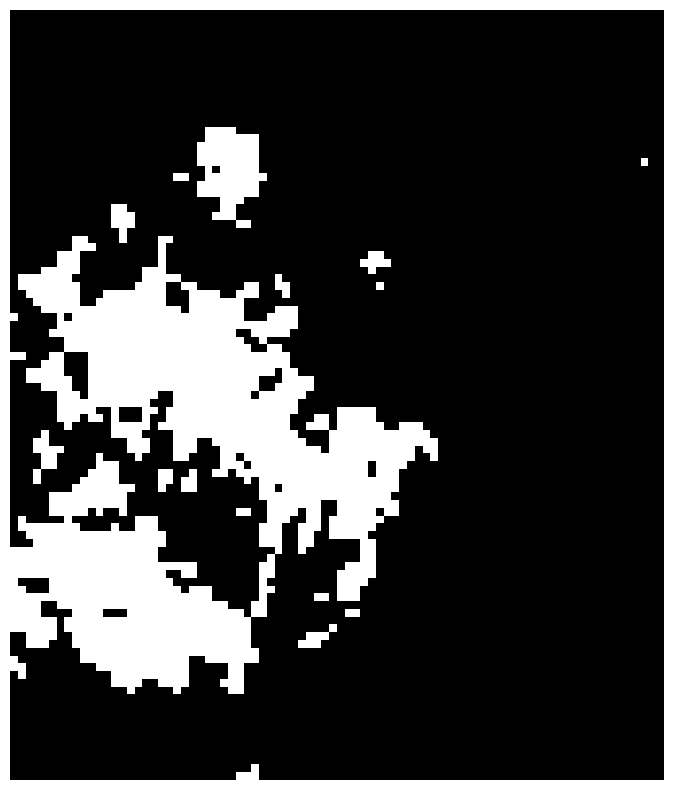

In [ ]:
kmeans_2_diff_change_labels = kmeans_2_diff.labels_.reshape(99, 84)
#change detection map based on the kmeans2 image differecing 256
plt.figure(figsize=(10,10))
plt.imshow(kmeans_2_diff_change_labels,cmap='Greys_r')
plt.axis("off")
plt.show()

In [ ]:
import rasterio
from affine import Affine

transf = ds_ex.GetGeoTransform()
afn = Affine.from_gdal(*transf)

# Replace 'sentinel_data' with your actual NumPy array containing the Sentinel-2 data
sentinel_data = kmeans_2_diff_change_labels

# Define the spatial information (coordinate reference system, resolution, and bounding box) for the GeoTIFF
# Replace these values with the appropriate information for your dataset
crs = 'EPSG:4326'  # The coordinate reference system (e.g., WGS 84)
transform =  afn # The affine transformation (how the data is georeferenced)
width, height = 1374, 1608  # Width and height of the data
# bbox = (23.856118,37.739514 ,24.039408, 37.836692 )         # The bounding box of the data (e.g., (minx, miny, maxx, maxy))

# Define the output GeoTIFF filename
output_geotiff = 'CD_result_Kmean2.tif'

# Create the profile for the GeoTIFF
profile = {
    'driver': 'GTiff',
    'dtype': sentinel_data.dtype,
    'count': 1,           # Number of bands (in this case, it's just one band)
    'height': height,
    'width': width,
    'crs': crs,
    'transform': transform,
    # 'bbox':bbox
}

# Write the data to a GeoTIFF file
with rasterio.open(output_geotiff, 'w', **profile) as dst:
    dst.write(sentinel_data, 1)  # '1' indicates the band index (only one band in this case)

## Validation

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import rasterio as rio
from rasterio import features
from rasterio.features import rasterize
import rasterio.plot as rioplt
import geopandas as gpd

In [ ]:
def simple_burnt_validation(prediction, labels,out_dir=None, postive_values=1, sampling = False):
    '''
    prediction: path of the prediction
    labels: path of the shapefile indicating the binary result
    sampling: default is false, if the ratio larger than 2 or smaller than 0.5, will be changed to True defautly
    '''
    rs_prediction = rio.open(prediction)
    rs_pred_prj = rs_prediction.crs.data['init']
    rs_pred_arr = rs_prediction.read().astype(np.int16)
    vector = gpd.read_file(labels)

    vector_rpj = vector.to_crs(rs_pred_prj)
    geom = [shapes for shapes in vector_rpj.geometry]
    rasterized_label = features.rasterize(geom,
                            out_shape = rs_prediction.shape,
                            fill = 0,
                            out = None,
                            transform = rs_prediction.transform,
                            all_touched = True,
                            default_value = 1,
                            dtype = None)
    # Plot raster
    fig, ax = plt.subplots(1,2, figsize = (20, 10))
    rioplt.show(rasterized_label, ax = ax[0])
    if postive_values:
        rioplt.show(rs_pred_arr, ax = ax[1])
    else:
        rioplt.show(1-rs_pred_arr, ax = ax[1])
    ax[0].axis("off")
    ax[0].set_title("Label")
    ax[1].axis("off")
    ax[1].set_title("Prediction")

    if type(out_dir) == str:
        plt.savefig(out_dir,dpi=300)
    else:
        plt.show()
    #check the ratio of the postive vs negative labels
    num_pos_label = np.sum(rasterized_label)
    num_neg_label = np.sum(1-rasterized_label)
    ratio = num_pos_label/num_neg_label
    if ratio < 0.5 or ratio>2:
        sampling = True

    #randomly downsampling the major label to fit the minor label
    if sampling:

        if num_pos_label < num_neg_label: #number of negative labels > postive
            majority_row_col = np.argwhere(rasterized_label==0)
            minority_row_col = np.argwhere(rasterized_label==1)
            minor_num = num_pos_label
            major_num = num_neg_label
            major_label = 0
        else:
            majority_row_col = np.argwhere(rasterized_label==1)
            minority_row_col = np.argwhere(rasterized_label==0)
            minor_num = num_neg_label
            major_num = num_pos_label
            major_label = 1

        rand_idx = np.random.randint(0, high=major_num, size=minor_num, dtype=int)
        sampled_major_row_col = majority_row_col[rand_idx,:]

        df_label = pd.DataFrame(data = {"row": np.concatenate((sampled_major_row_col[:,0],minority_row_col[:,0]),axis = 0),
                                    "col":np.concatenate((sampled_major_row_col[:,1],minority_row_col[:,1]),axis = 0),
                                    "label": np.concatenate((np.full((minor_num,),major_label),np.full((minor_num,),1-major_label)),axis = 0)})
        pred_arr = rs_pred_arr[:,df_label.row.values,df_label.col.values].flatten()
        if postive_values:
            df_pred = pd.DataFrame(data = {"row": df_label.row.values,
                                            "col": df_label.col.values,
                                            "label": pred_arr})
        else:
            df_pred = pd.DataFrame(data = {"row": df_label.row.values,
                                            "col": df_label.col.values,
                                            "label": 1-pred_arr})

    #no downsampling, comparing directly
    else:
        neg_label_loc = np.argwhere(rasterized_label==0)
        pos_label_loc = np.argwhere(rasterized_label==1)
        df_label =  pd.DataFrame(data = {"row": np.concatenate((neg_label_loc[:,0],pos_label_loc[:,0]),axis = 0),
                                "col":np.concatenate((neg_label_loc[:,1],pos_label_loc[:,1]),axis = 0),
                                "label": np.concatenate((np.full((neg_label_loc.shape[0],),0),np.full((pos_label_loc.shape[0],),1)),axis = 0)})
        pred_arr = rs_pred_arr[:,df_label.row.values,df_label.col.values].flatten()
        if postive_values:
            df_pred = pd.DataFrame(data = {"row": df_label.row.values,
                                            "col": df_label.col.values,
                                            "label": pred_arr})
        else:
            df_pred = pd.DataFrame(data = {"row": df_label.row.values,
                                            "col": df_label.col.values,
                                            "label": 1-pred_arr})

    cm = confusion_matrix(df_label.label.values, df_pred.label.values)

    f1 = f1_score(df_label.label.values, df_pred.label.values)
    precision = precision_score(df_label.label.values, df_pred.label.values)
    recall = recall_score(df_label.label.values, df_pred.label.values)
    accuracy = accuracy_score(df_label.label.values, df_pred.label.values)

    return df_label,df_pred,cm,f1,precision,recall,accuracy

### CNN_CLR

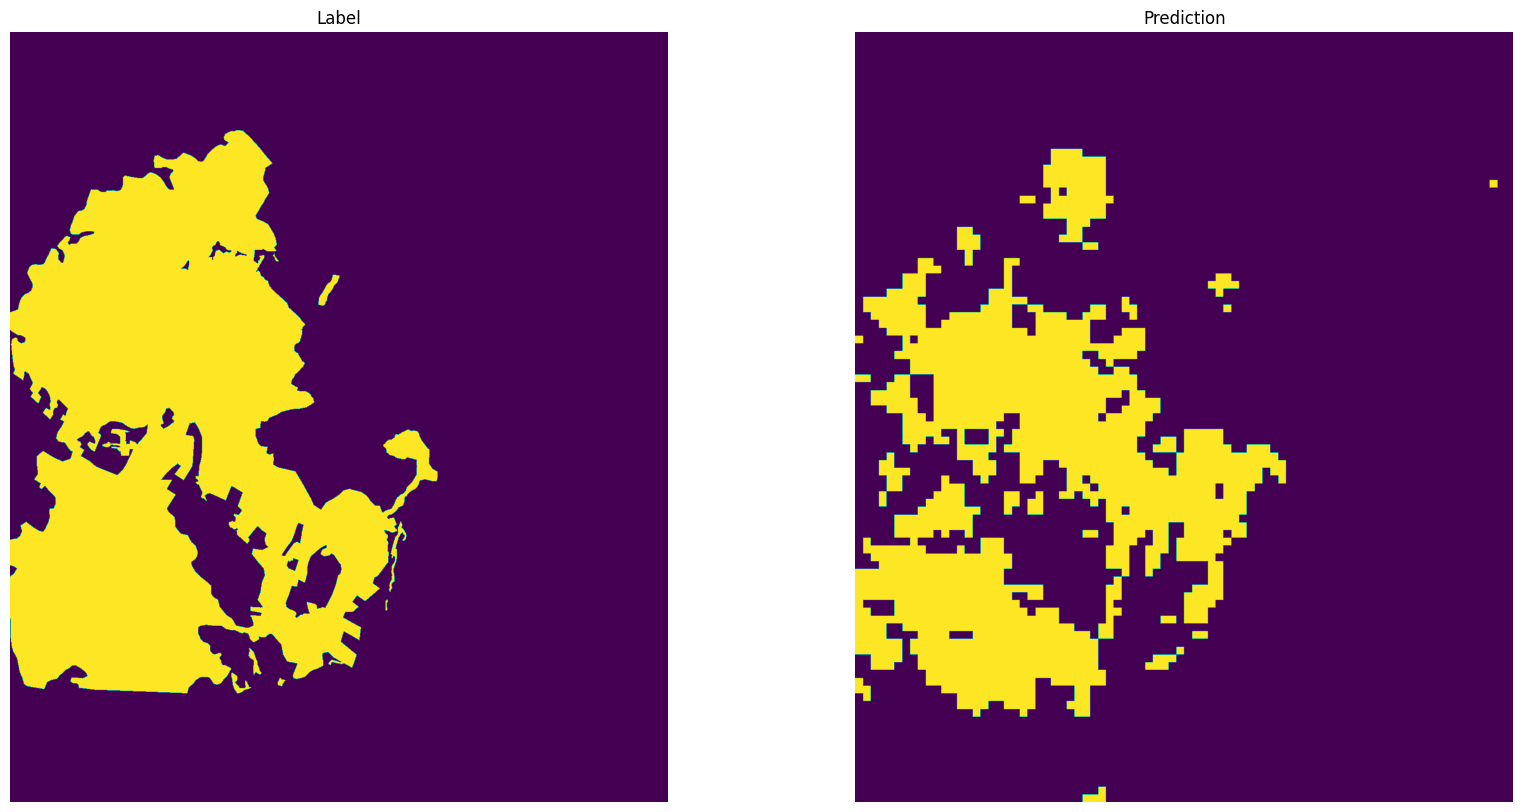

In [ ]:
df_label,df_pred,cm,f1,precision,recall,accuracy = simple_burnt_validation("/content/CD_result_Kmean2.tif", "/content/EMSR672_AOI01_DEL_PRODUCT_observedEventA_v1.shp", out_dir = "/content/cnnclr_cluster.png",sampling = True)

F1 score: 0.726 
Precision: 0.930 
Recall: 0.595 
Accuracy: 0.775 



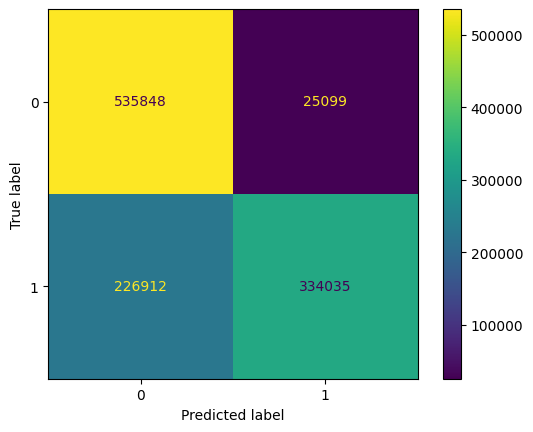

In [ ]:
print("F1 score: %.3f \nPrecision: %.3f \nRecall: %.3f \nAccuracy: %.3f \n" %(f1,precision,recall,accuracy))
cm_display = ConfusionMatrixDisplay(cm).plot()
# 0 is unburnt, 1 is burnt

### SAM

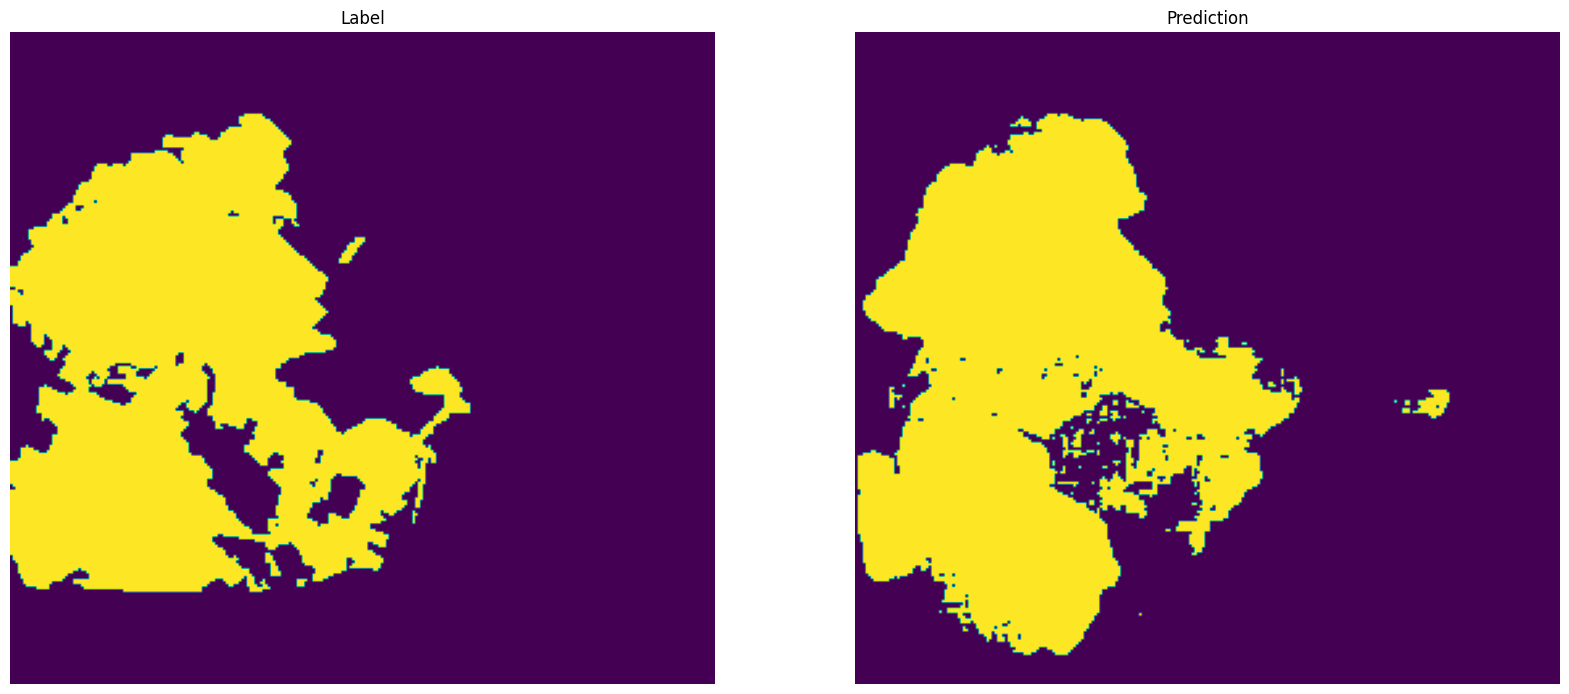

In [ ]:
df_label,df_pred,cm,f1,precision,recall,accuracy = simple_burnt_validation("/content/samraster.tif", "/content/EMSR672_AOI01_DEL_PRODUCT_observedEventA_v1.shp", out_dir = "/content/sam_cluster.png",sampling = True)

F1 score: 0.880 
Precision: 0.919 
Recall: 0.844 
Accuracy: 0.885 



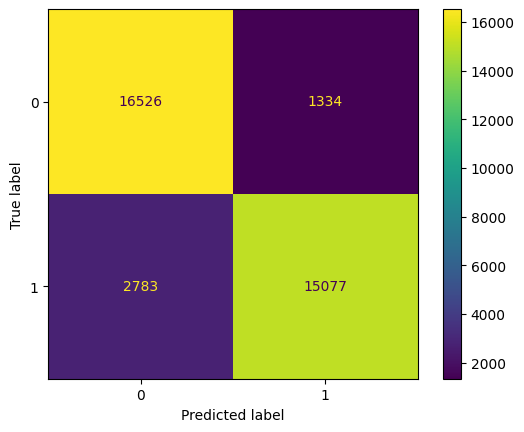

In [ ]:
print("F1 score: %.3f \nPrecision: %.3f \nRecall: %.3f \nAccuracy: %.3f \n" %(f1,precision,recall,accuracy))
cm_display = ConfusionMatrixDisplay(cm).plot()
# 0 is unburnt, 1 is burnt